## Import Data

In [1]:
import numpy as np
import pandas as pd
import quandl
from arch import arch_model
from matplotlib import pyplot
from random import gauss
from random import seed
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as ts

# seed pseudorandom number generator
seed(1)

gbpusd = quandl.get("FRED/DEXUSUK", start_date='2017-01-01', end_date='2018-01-01', api_key='enter_api_key')
gbpusd

,Value
Date,
2017-01-03,1.2256
2017-01-04,1.2299
2017-01-05,1.2415
2017-01-06,1.2314
2017-01-09,1.2167
...,...
2017-12-22,1.3379
2017-12-26,1.3369
2017-12-27,1.3403


## Data Converted to log format to smooth out extreme values and reduce volatility

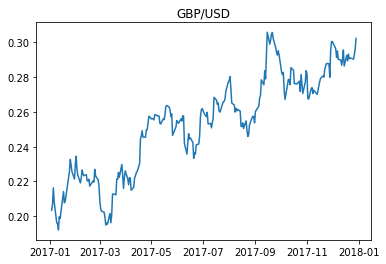

In [2]:
data=gbpusd['Value']
data=np.log(data)
pyplot.plot(data)
pyplot.title("GBP/USD")
pyplot.show()

## Data is first differenced to approximate a Gaussian distribution

In [3]:
data=np.diff(data,1)

In [4]:
result = ts.adfuller(data, 1)
result

(-12.380335699861567,
 5.045829408723097e-23,
 1,
 246,
 {'1%': -3.457215237265747,
  '5%': -2.873361841566324,
  '10%': -2.5730700760129555},
 -1892.8308007824835)

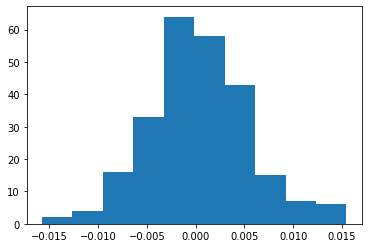

In [5]:
# plot
pyplot.hist(data)
pyplot.show()

## QQ Plot: Visual Screening for Normality

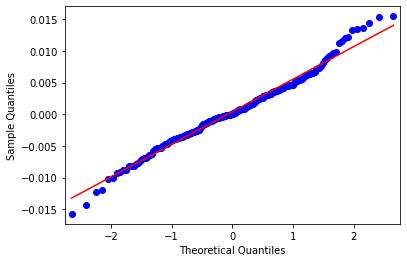

In [6]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot
qqplot(data, line='s')
pyplot.show()

## GARCH Modelling

In [7]:
# split into train/test
n_test = 30
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)

In [8]:
model

Zero Mean(constant: no, no. of exog: 0, volatility: GARCH(p: 15, q: 15), distribution: Normal distribution), id: 0x7f116f709978

In [9]:
train

array([ 3.50234526e-03,  9.38746070e-03, -8.16859247e-03, -1.20094577e-02,
       -1.64392570e-04, -3.87102571e-03,  7.64523433e-03, -1.06518098e-03,
        1.54562582e-02, -6.39755998e-03,  8.12083852e-04,  1.33851378e-02,
        3.67765045e-03,  7.07728293e-03, -3.25410026e-03, -3.82318267e-03,
       -4.23848049e-03,  8.53853490e-03,  4.59807374e-03, -8.10042549e-03,
       -2.95468372e-03, -4.32797021e-03,  2.88739373e-03,  4.55472440e-03,
       -2.15491524e-03, -1.11919430e-03,  6.39692969e-04, -3.60360750e-03,
        0.00000000e+00,  9.62232453e-04, -3.93495790e-03,  2.97272544e-03,
       -7.22282444e-04,  7.35885580e-03, -3.91264922e-03, -2.08233296e-03,
       -3.69478332e-03, -8.80991756e-03, -4.14887721e-03, -1.46842905e-03,
       -4.89955914e-04, -2.78096041e-03, -4.67961939e-03,  1.15141061e-03,
       -6.57786572e-04,  6.23157149e-03, -5.40940586e-03,  4.42805152e-03,
        1.20365799e-02,  1.61668418e-04, -5.65953849e-04,  9.17733055e-03,
       -2.40432780e-04,  

In [10]:
test

array([ 2.42773809e-03,  1.89257788e-03,  1.43596745e-03, -6.79938076e-04,
        4.44897616e-03,  3.38003101e-03, -2.24980315e-04, -7.67960407e-03,
        1.53751107e-02,  5.19635940e-03, -7.40439081e-05, -2.96626098e-03,
       -1.11462022e-03, -5.06858569e-03,  3.72939941e-03, -4.85093679e-03,
       -2.99289190e-04, -2.99782882e-03,  3.14748461e-03,  5.59598550e-03,
       -9.26901538e-03,  6.13912237e-03, -3.13972000e-03,  3.88582166e-03,
       -2.68857518e-03,  5.23344934e-04, -7.47719490e-04,  2.53996850e-03,
        3.50054355e-03,  5.85642357e-03])

In [11]:
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

Iteration:      1,   Func. Count:     33,   Neg. LLF: -838.5346788788615
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -838.534679019013
            Iterations: 5
            Function evaluations: 33
            Gradient evaluations: 1


/home/michael/.local/lib/python3.6/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.698e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/home/michael/.local/lib/python3.6/site-packages/arch/univariate/base.py:709: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


In [12]:
yhat

In [13]:
test=pd.DataFrame(test)

## Comparison of Predicted Variance and actual 5-day Rolling Variance

Text(0.5, 1.0, '5-day Rolling Variance')

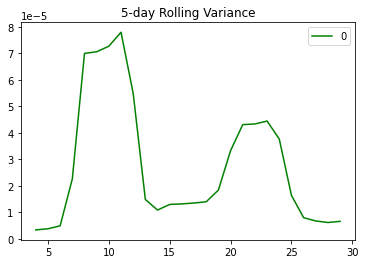

In [14]:
# Rolling Window
test.rolling(window=5).var().plot(style='g')
pyplot.title("5-day Rolling Variance")

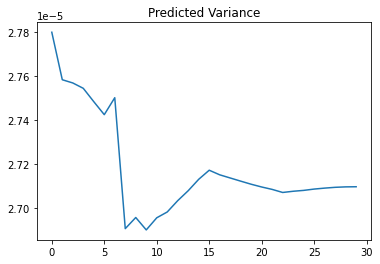

In [15]:
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.title("Predicted Variance")
pyplot.show()

## References

### [- Machine Learning Mastery: How to Model Volatility with ARCH and GARCH for Time Series Forecasting in Python](https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/)